## **Importing Necessary Libaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

In [ ]:
horse_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/horseasses-population-in-nepal-by-district.csv')
milk_animals_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/milk-animals-and-milk-production-in-nepal-by-district.csv')
meat_prod_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/net-meat-production-in-nepal-by-district.csv')
cotton_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/production-of-cotton-in-nepal-by-district.csv')
egg_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/production-of-egg-in-nepal-by-district.csv')
rabbit_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/rabbit-population-in-nepal-by-district.csv')
wool_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/wool-production-in-nepal-by-district.csv')
yak_nak_chauri_data = pd.read_csv('/content/drive/MyDrive/DAML_Individual/yak-nak-chauri-population-in-nepal-by-district.csv')

In [ ]:
# changing the dataset naming convention
df1 = meat_prod_data
df2 = milk_animals_data
df3 = egg_data
df4 = wool_data
df5 = horse_data
df6 = rabbit_data
df7 = yak_nak_chauri_data
df8 = cotton_data

### Data Preprocessing & Cleaning

####  Meat Data

In [ ]:
df1.head()

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,607,31,491,443,172,0,1744
1,SANKHUWASABHA,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,1123,28,416,428,166,0,2161
3,E.MOUNTAIN,3376,100,1865,1380,640,1,7362
4,PANCHTHAR,1496,4,940,730,248,1,3419


In [ ]:
df1.tail()

,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
91,KAILALI,5962,71,1480,469,1303,4,9289
92,KANCHANPUR,3816,27,850,360,1085,2,6140
93,FW.TERAI,9778,98,2330,829,2388,6,15429
94,FW.REGION,18154,335,6893,985,2734,6,29107
95,NEPAL,175005,2684,65583,23509,55041,237,322059


In [ ]:
# info of datset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DISTRICT    96 non-null     object
 1   BUFF        96 non-null     int64 
 2   MUTTON      96 non-null     int64 
 3   CHEVON      96 non-null     int64 
 4   PORK        96 non-null     int64 
 5   CHICKEN     96 non-null     int64 
 6   DUCK MEAT   96 non-null     int64 
 7   TOTAL MEAT  96 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ KB


In [ ]:
# numerical description
df1.describe()

,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
count,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,7291.87500,111.833333,2732.625000,979.541667,2293.375000,9.875000,13419.125000
std,19484.37418,314.001598,7245.635676,2713.977477,6645.981822,28.561015,35967.078276
min,0.00000,0.000000,56.000000,1.000000,5.000000,0.000000,78.000000
25%,1438.50000,10.000000,575.000000,114.000000,208.250000,0.000000,2771.000000
50%,2558.00000,31.000000,890.000000,326.000000,489.000000,2.000000,4502.000000
75%,4447.00000,90.750000,1689.500000,711.250000,1615.250000,6.000000,7827.500000
max,175005.00000,2684.000000,65583.000000,23509.000000,55041.000000,237.000000,322059.000000


In [ ]:
# checking for duplicate values
df1.duplicated().sum()

0

In [ ]:
# checking for null values
df1.isnull().sum()

DISTRICT      0
BUFF          0
MUTTON        0
CHEVON        0
PORK          0
CHICKEN       0
DUCK MEAT     0
TOTAL MEAT    0
dtype: int64

In [ ]:
df1['DISTRICT'] = df1['DISTRICT'].replace('SANKHUWASABHA', 'SANKHUWASHAVA')

In [ ]:
# checking for unrealistic values into categorical column
df1['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C.REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS', 'NAWALPARASI',
       'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W.REGION', 'DOLPA', 'MUGU',
       'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN', 'RUKUM', 'ROLPA',
       'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'MW.HILLS',
       'DANG', 'BANKE'

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df1.select_dtypes(include='int').columns

# identify the rows with negative values
df1[numeric_column].lt(0).any(axis=1).sum()

0

#### Milk Data

In [ ]:
df2.head()

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,7819,13501,2948,5493,8441.0
3,E.MOUNTAIN,31284,31855,15324,20339,35663.0
4,PANCHTHAR,14854,11331,8511,9835,18346.0


In [ ]:
df2.tail()

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
91,KAILALI,27758,41103,27905,36677,64582.0
92,KANCHANPUR,20164,27812,23146,25876,49022.0
93,FW.TERAI,47922,68915,51051,62553,113604.0
94,FW. REGION,130595,132257,87936,112438,200374.0
95,NEPAL,1026135,1355384,643806,1210441,NaN


In [ ]:
# info of datset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                96 non-null     object 
 1   MILKING  COWS NO.       96 non-null     int64  
 2   MILKING  BUFFALOES NO.  96 non-null     int64  
 3   COW MILK                96 non-null     int64  
 4   BUFF MILK               96 non-null     int64  
 5   TOTAL MILK PRODUCED     95 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.6+ KB


In [ ]:
# numerical description
df2.describe()

,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
count,9.600000e+01,9.600000e+01,96.000000,9.600000e+01,95.000000
mean,4.275562e+04,5.647433e+04,26825.260417,5.043505e+04,58555.189474
std,1.144496e+05,1.508551e+05,71948.998086,1.358044e+05,96696.838132
min,4.520000e+02,0.000000e+00,259.000000,0.000000e+00,259.000000
25%,8.074750e+03,1.020550e+04,4630.750000,9.085000e+03,14179.500000
50%,1.513050e+04,1.954000e+04,8343.500000,1.710250e+04,28027.000000
75%,2.600800e+04,3.674975e+04,15694.000000,3.110500e+04,43324.000000
max,1.026135e+06,1.355384e+06,643806.000000,1.210441e+06,536299.000000


In [ ]:
# checking for duplicate values
df2.duplicated().sum()

0

In [ ]:
# checking for null values
df2.isnull().sum()

DISTRICT                  0
MILKING  COWS NO.         0
MILKING  BUFFALOES NO.    0
COW MILK                  0
BUFF MILK                 0
TOTAL MILK PRODUCED       1
dtype: int64

In [ ]:
# checking for unrealistic values into categorical column
df2['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E. REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C. REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA',
       'LAMJUNG', 'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA',
       'MYAGDI', 'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS',
       'NAWALPARASI', 'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W. REGION',
       'DOLPA', 'MUGU', 'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN',
       'RUKUM', 'ROLPA', 'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH',
       'SURKHET', 'MW.HILLS', 'DANG', 'BAN

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df2.select_dtypes(include=['int', 'float']).columns

# identify the rows with negative values
df2[numeric_column].lt(0).any(axis=1).sum()

0

In [ ]:
# renaming rows
condition_e = df2['DISTRICT'] == 'E. REGION'
df2.loc[condition_e, 'DISTRICT'] = 'E.REGION'

condition_c = df2['DISTRICT'] == 'C. REGION'
df2.loc[condition_c, 'DISTRICT'] = 'C.REGION'

condition_w = df2['DISTRICT'] == 'W. REGION'
df2.loc[condition_w, 'DISTRICT'] = 'W.REGION'

condition_mw = df2['DISTRICT'] == 'MW. REGION'
df2.loc[condition_mw, 'DISTRICT'] = 'MW.REGION'

condition_fw = df2['DISTRICT'] == 'FW. REGION'
df2.loc[condition_fw, 'DISTRICT'] = 'FW.REGION'

In [ ]:
# removing null values
total_milk_produced_sum = df2['TOTAL MILK PRODUCED'].sum()
df2['TOTAL MILK PRODUCED'].fillna(total_milk_produced_sum, inplace=True)

In [ ]:
df2.tail(1)

,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
95,NEPAL,1026135,1355384,643806,1210441,5562743.0


####  Egg Data

In [ ]:
# Displaying First five rows
df3.head()

,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,77512.0,465,5506,34,5540
2,SOLUKHUMBU,42671.0,374,2345,28,2373
3,E.MOUNTAIN,135548.0,1180,10271,87,10358
4,PANCHTHAR,63779.0,261,5581,19,5600


In [ ]:
# Last Five rows
df3.tail()

,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
91,KAILALI,277409.3,3418,16928,275,17203
92,KANCHANPUR,186108.0,1932,13483,155,13638
93,FW.TERAI,463517.8,5350,30411,430,30841
94,FW.REGION,537737.0,6372,40743,504,41247
95,NEPAL,12353515.0,180927,1294166,13906,1308072


In [ ]:
# info of datset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DISTRICT     96 non-null     object 
 1   LAYING HEN   96 non-null     float64
 2   LAYING DUCK  96 non-null     int64  
 3   HEN EGG      96 non-null     int64  
 4   DUCK EGG     96 non-null     int64  
 5   TOTAL EGG    96 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.6+ KB


In [ ]:
# numerical description
df3.describe()

,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
count,9.600000e+01,96.000000,9.600000e+01,96.000000,9.600000e+01
mean,5.147298e+05,7538.625000,5.392358e+04,579.416667,5.450300e+04
std,1.536131e+06,21446.360692,1.650960e+05,1649.968112,1.665308e+05
min,1.488000e+03,3.000000,2.100000e+02,0.000000,2.110000e+02
25%,3.319350e+04,317.750000,3.060750e+03,24.750000,3.099000e+03
50%,1.113675e+05,1422.500000,7.769500e+03,109.500000,7.978500e+03
75%,3.037330e+05,4475.500000,3.172875e+04,326.250000,3.259750e+04
max,1.235352e+07,180927.000000,1.294166e+06,13906.000000,1.308072e+06


In [ ]:
# checking for duplicate values
df3.duplicated().sum()

0

In [ ]:
# checking for null values
df3.isnull().sum()

DISTRICT       0
LAYING HEN     0
LAYING DUCK    0
HEN EGG        0
DUCK EGG       0
TOTAL EGG      0
dtype: int64

In [ ]:
# checking for unrealistic values into categorical column
df3['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C.REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS', 'NAWALPARASI',
       'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W.REGION', 'DOLPA', 'MUGU',
       'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN', 'RUKUM', 'ROLPA',
       'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'MW.HILLS',
       'DANG', 'BANKE'

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df3.select_dtypes(include=['int', 'float']).columns

# identify the rows with negative values
df3[numeric_column].lt(0).any(axis=1).sum()

0

####  Sheep/Wool Data

In [ ]:
# first five rows
df4.head()

,DISTRICT,SHEEPS NO.,SHEEP WOOL PRODUCED
0,TAPLEJUNG,5777,3519
1,SANKHUWASHAVA,12181,9050
2,SOLUKHUMBU,8461,6286
3,E.MOUNTAIN,26419,18855
4,PANCHTHAR,1338,994


In [ ]:
# last five rows
df4.tail()

,DISTRICT,SHEEPS NO.,SHEEP WOOL PRODUCED
91,KAILALI,21267,15801
92,KANCHANPUR,7953,5909
93,FW.TERAI,29220,21710
94,FW.REGION,102571,76314
95,NEPAL,800658,588348


In [ ]:
# info of datset
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DISTRICT             96 non-null     object
 1   SHEEPS NO.           96 non-null     int64 
 2   SHEEP WOOL PRODUCED  96 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [ ]:
# numerical description
df4.describe()

,SHEEPS NO.,SHEEP WOOL PRODUCED
count,96.000000,96.000000
mean,33360.750000,24514.500000
std,94126.278004,69318.271646
min,36.000000,13.000000
25%,2637.500000,1958.750000
50%,9130.500000,6414.500000
75%,26427.250000,19054.500000
max,800658.000000,588348.000000


In [ ]:
# checking for duplicate values
df3.duplicated().sum()

0

In [ ]:
# checking for null values
df4.isnull().sum()

DISTRICT               0
SHEEPS NO.             0
SHEEP WOOL PRODUCED    0
dtype: int64

In [ ]:
# checking for unrealistic values into categorical column
df4['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'E.MOUNTAIN',
       'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR',
       'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'E.HILLS', 'JHAPA', 'MORANG',
       'SUNSARI', 'SAPTARI', 'SIRAHA', 'E.TERAI', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'C.MOUNTAIN', 'RAMECHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT',
       'DHADING', 'MAKWANPUR', 'C.HILLS', 'DHANUSHA', 'MAHOTTARI',
       'SARLAHI', 'RAUTAHAT', 'BARA', 'PARSA', 'CHITWAN', 'C.TERAI',
       'C.REGION', 'MANANG', 'MUSTANG', 'W.MOUNTAIN', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'W.HILLS', 'NAWALPARASI',
       'RUPANDEHI', 'KAPILBASTU', 'W.TERAI', 'W.REGION', 'DOLPA', 'MUGU',
       'HUMLA', 'JUMLA', 'KALIKOT', 'MW.MOUNTAIN', 'RUKUM', 'ROLPA',
       'PYUTHAN', 'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'MW.HILLS',
       'DANG', 'BANKE'

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df4.select_dtypes(include=['int', 'float']).columns

# identify the rows with negative values
df4[numeric_column].lt(0).any(axis=1).sum()

0

#### Horse/Asses Data

In [ ]:
# first five rows
df5.head()

,DISTRICT,Horses/Asses
0,TAPLEJUNG,543
1,SANKHUWASHAVA,358
2,SOLUKHUMBU,1775
3,PANCHTHAR,15
4,ILLAM,2815


In [ ]:
# last five rows
df5.tail()

,DISTRICT,Horses/Asses
55,DOTI,252
56,BAITADI,484
57,DADELDHURA,241
58,FW.REGION,3811
59,Total,55808


In [ ]:
# info of datset
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DISTRICT      60 non-null     object
 1   Horses/Asses  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# numerical description
df5.describe()

,Horses/Asses
count,60.000000
mean,2790.400000
std,8447.864779
min,12.000000
25%,122.250000
50%,493.000000
75%,1510.250000
max,55808.000000


In [ ]:
# checking for duplicate values
df5.duplicated().sum()

0

In [ ]:
# checking for null values
df5.isnull().sum()

DISTRICT        0
Horses/Asses    0
dtype: int64

In [ ]:
# checking for unrealistic values into categorical column
df5['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'TERATHUM', 'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR',
       'JHAPA', 'MORANG', 'SUNSARI', 'E.REGION', 'NUWAKOT', 'RAUTAHAT',
       'BARA', 'CHITWAN', 'C.REGION', 'MANANG', 'MUSTANG', 'GORKHA',
       'LAMJUNG', 'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'NAWALPARASI', 'RUPANDEHI',
       'KAPILBASTU', 'W.REGION', 'DOLPA', 'MUGU', 'JUMLA', 'HUMLA',
       'KALIKOT', 'RUKUM', 'ROLPA', 'PYUTHAN', 'SALYAN', 'JAJARKOT',
       'DAILEKH', 'SURKHET', 'DANG', 'BANKE', 'BARDIYA', 'MW.REGION',
       'BAJURA', 'BAJHANG', 'DARCHULA', 'ACHHAM', 'DOTI', 'BAITADI',
       'DADELDHURA', 'FW.REGION', 'Total'], dtype=object)

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df5.select_dtypes(include='int').columns

# identify the rows with negative values
df5[numeric_column].lt(0).any(axis=1).sum()

0

In [ ]:
# renaming column
df5['DISTRICT'] = df5['DISTRICT'].replace('TERATHUM', 'TERHATHUM')
df5['DISTRICT'] = df5['DISTRICT'].replace('Total', 'NEPAL')

In [ ]:
df5.head(6)

,DISTRICT,Horses/Asses
0,TAPLEJUNG,543
1,SANKHUWASHAVA,358
2,SOLUKHUMBU,1775
3,PANCHTHAR,15
4,ILLAM,2815
5,TERHATHUM,42


In [ ]:
df5.tail(1)

,DISTRICT,Horses/Asses
59,NEPAL,55808


####  Rabbit Data

In [ ]:
# first five rows
df6.head()

,DISTRICT,Rabbit
0,TAPLEJUNG,506
1,SANKHUWASHAVA,313
2,SOLUKHUMBU,105
3,PANCHTHAR,29
4,ILLAM,240


In [ ]:
# last five rows
df6.tail()

,DISTRICT,Rabbit
50,BAJHANG,148
51,DARCHULA,522
52,DOTI,432
53,FW.REGION,1387
54,Total,32213


In [ ]:
# info of datset
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DISTRICT  55 non-null     object
 1   Rabbit    55 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


In [ ]:
# numerical description
df6.describe()

,Rabbit
count,55.000000
mean,1757.072727
std,4684.882317
min,19.000000
25%,179.000000
50%,506.000000
75%,1135.500000
max,32213.000000


In [ ]:
# checking for duplicate values
df6.duplicated().sum()

0

In [ ]:
# checking for null values
df6.isnull().sum()

DISTRICT    0
Rabbit      0
dtype: int64

In [ ]:
# checking for unrealistic values into categorical column
df6['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'TERHATHUM', 'DHANKUTA', 'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA',
       'UDAYAPUR', 'JHAPA', 'SUNSARI', 'E.REGION', 'SINDHUPALCHOK',
       'KATHMANDU', 'DHADING', 'KAVRE', 'RASUWA', 'RAMECHHAP',
       'MAKWANPUR', 'BARA', 'C.REGION', 'MANANG', 'GORKHA', 'LAMJUNG',
       'TANAHU', 'KASKI', 'PARBAT', 'SYANGJA', 'PALPA', 'MYAGDI',
       'BAGLUNG', 'GULMI', 'ARGHAKHANCHI', 'NAWALPARASI', 'RUPANDEHI',
       'KAPILBASTU', 'W.REGION', 'DOLPA', 'MUGU', 'JUMLA', 'HUMLA',
       'KALIKOT', 'RUKUM', 'JAJARKOT', 'SURKHET', 'DAILEKH', 'MW.REGION',
       'BAJURA', 'BAJHANG', 'DARCHULA', 'DOTI', 'FW.REGION', 'Total'],
      dtype=object)

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df6.select_dtypes(include='int').columns

# identify the rows with negative values
df6[numeric_column].lt(0).any(axis=1).sum()

0

In [ ]:
# renaming column
df6['DISTRICT'] = df6['DISTRICT'].replace('RAMECHHAP', 'RAMECHAP')
df6['DISTRICT'] = df6['DISTRICT'].replace('Total', 'NEPAL')

In [ ]:
df6.iloc[18:20]

,DISTRICT,Rabbit
18,RASUWA,581
19,RAMECHAP,74


In [ ]:
df6.tail(1)

,DISTRICT,Rabbit
54,NEPAL,32213


#### Yak-Nak-Chauri Data

In [ ]:
# first five rows
df7.head()

,DISTRICT,YAK/NAK/CHAURI
0,TAPLEJUNG,3465
1,SANKHUWASHAVA,3945
2,SOLUKHUMBU,12235
3,PANCHTHAR,1075
4,ILLAM,165


In [ ]:
# last five rows
df7.tail()

,DISTRICT,YAK/NAK/CHAURI
30,BAJURA,89
31,BAJHANG,381
32,DARCHULA,422
33,FW.REGION,892
34,Total,68831


In [ ]:
# info of datset
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DISTRICT        35 non-null     object
 1   YAK/NAK/CHAURI  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


In [ ]:
# numerical description
df7.describe()

,YAK/NAK/CHAURI
count,35.00000
mean,5899.80000
std,12300.08377
min,25.00000
25%,407.00000
50%,1075.00000
75%,5556.00000
max,68831.00000


In [ ]:
# checking for duplicate values
df7.duplicated().sum()

0

In [ ]:
# checking for null values
df7.isnull().sum()

DISTRICT          0
YAK/NAK/CHAURI    0
dtype: int64

In [ ]:
# checking for unrealistic values into categorical column
df7['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'RAMECHAP', 'NUWAKOT', 'DHADING',
       'C.REGION', 'MANANG', 'MUSTANG', 'GORKHA', 'LAMJUNG', 'KASKI',
       'MYAGDI', 'W.REGION', 'DOLPA', 'MUGU', 'HUMLA', 'JUMLA', 'KALIKOT',
       'RUKUM', 'MW.REGION', 'BAJURA', 'BAJHANG', 'DARCHULA', 'FW.REGION',
       'Total'], dtype=object)

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df7.select_dtypes(include='int').columns

# identify the rows with negative values
df7[numeric_column].lt(0).any(axis=1).sum()

0

In [ ]:
# renaming
df6['DISTRICT'] = df6['DISTRICT'].replace('RAMECHHAP', 'RAMECHAP')
df7['DISTRICT'] = df7['DISTRICT'].replace('Total', 'NEPAL')

In [ ]:
df7.tail(1)

,DISTRICT,YAK/NAK/CHAURI
34,NEPAL,68831


#### 8. Cotton Data

In [ ]:
# first five rows
df7.head()

,DISTRICT,YAK/NAK/CHAURI
0,TAPLEJUNG,3465
1,SANKHUWASHAVA,3945
2,SOLUKHUMBU,12235
3,PANCHTHAR,1075
4,ILLAM,165


In [ ]:
# last five rows
df7.tail()

,DISTRICT,YAK/NAK/CHAURI
30,BAJURA,89
31,BAJHANG,381
32,DARCHULA,422
33,FW.REGION,892
34,NEPAL,68831


In [ ]:
# info of datset
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DISTRICT        35 non-null     object
 1   YAK/NAK/CHAURI  35 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


In [ ]:
# numerical description
df7.describe()

,YAK/NAK/CHAURI
count,35.00000
mean,5899.80000
std,12300.08377
min,25.00000
25%,407.00000
50%,1075.00000
75%,5556.00000
max,68831.00000


In [ ]:
# checking for duplicate values
df7.duplicated().sum()

0

In [ ]:
# checking for null values
df7.isnull().sum()

DISTRICT          0
YAK/NAK/CHAURI    0
dtype: int64

In [ ]:
# checking for unrealistic values into categorical column
df7['DISTRICT'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA', 'E.REGION', 'DOLAKHA',
       'SINDHUPALCHOK', 'RASUWA', 'RAMECHAP', 'NUWAKOT', 'DHADING',
       'C.REGION', 'MANANG', 'MUSTANG', 'GORKHA', 'LAMJUNG', 'KASKI',
       'MYAGDI', 'W.REGION', 'DOLPA', 'MUGU', 'HUMLA', 'JUMLA', 'KALIKOT',
       'RUKUM', 'MW.REGION', 'BAJURA', 'BAJHANG', 'DARCHULA', 'FW.REGION',
       'NEPAL'], dtype=object)

In [ ]:
# checking for unrealistic values into numerical column of the dataset
numeric_column = df7.select_dtypes(include='int').columns

# identify the rows with negative values
df7[numeric_column].lt(0).any(axis=1).sum()

0

### Cotton Data

In [ ]:
# renaming
df8['DISTRICT'] = df8['DISTRICT'].str.upper()

In [ ]:
df8.head()

,DISTRICT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,DANG,106,74,700
1,BANKE,27,41,1519
2,BARDIYA,10,12,1200
3,NEPAL,143,127,890


### Data Enrichment

In [ ]:
def my_helper_function(dataframe):
    dataframe.insert(1, 'ECOLOGICAL BELT', '')
    dataframe.insert(2, 'DEVELOPMENT REGION', '')
    index_of_e_mountain = dataframe.index[dataframe['DISTRICT'] == 'E.MOUNTAIN'].tolist()[0]
    index_of_e_hill = dataframe.index[dataframe['DISTRICT'] == 'E.HILLS'].tolist()[0]
    index_of_e_terai = dataframe.index[dataframe['DISTRICT'] == 'E.TERAI'].tolist()[0]
    index_of_e_region = dataframe.index[dataframe['DISTRICT'] == 'E.REGION'].tolist()[0]
    index_of_c_mountain = dataframe.index[dataframe['DISTRICT'] == 'C.MOUNTAIN'].tolist()[0]
    index_of_c_hill = dataframe.index[dataframe['DISTRICT'] == 'C.HILLS'].tolist()[0]
    index_of_c_terai = dataframe.index[dataframe['DISTRICT'] == 'C.TERAI'].tolist()[0]
    index_of_c_region = dataframe.index[dataframe['DISTRICT'] == 'C.REGION'].tolist()[0]
    index_of_w_mountain = dataframe.index[dataframe['DISTRICT'] == 'W.MOUNTAIN'].tolist()[0]
    index_of_w_hill = dataframe.index[dataframe['DISTRICT'] == 'W.HILLS'].tolist()[0]
    index_of_w_terai = dataframe.index[dataframe['DISTRICT'] == 'W.TERAI'].tolist()[0]
    index_of_w_region = dataframe.index[dataframe['DISTRICT'] == 'W.REGION'].tolist()[0]
    index_of_mw_mountain = dataframe.index[dataframe['DISTRICT'] == 'MW.MOUNTAIN'].tolist()[0]
    index_of_mw_hill = dataframe.index[dataframe['DISTRICT'] == 'MW.HILLS'].tolist()[0]
    index_of_mw_terai = dataframe.index[dataframe['DISTRICT'] == 'MW.TERAI'].tolist()[0]
    index_of_mw_region = dataframe.index[dataframe['DISTRICT'] == 'MW.REGION'].tolist()[0]
    index_of_fw_mountain = dataframe.index[dataframe['DISTRICT'] == 'FW.MOUNTAIN'].tolist()[0]
    index_of_fw_hill = dataframe.index[dataframe['DISTRICT'] == 'FW.HILLS'].tolist()[0]
    index_of_fw_terai = dataframe.index[dataframe['DISTRICT'] == 'FW.TERAI'].tolist()[0]
    index_of_fw_region = dataframe.index[dataframe['DISTRICT'] == 'FW.REGION'].tolist()[0]
    dataframe.loc[:index_of_e_mountain, 'ECOLOGICAL BELT'] = 'MOUNTAIN'
    dataframe.loc[index_of_e_mountain+1:index_of_e_hill, 'ECOLOGICAL BELT'] = 'HILL'
    dataframe.loc[index_of_e_hill+1:index_of_e_terai, 'ECOLOGICAL BELT'] = 'TERAI'
    dataframe.loc[:index_of_e_region, 'DEVELOPMENT REGION'] = 'EASTERN REGION'
    dataframe.loc[index_of_e_region+1:index_of_c_mountain, 'ECOLOGICAL BELT'] = 'MOUNTAIN'
    dataframe.loc[index_of_c_mountain+1:index_of_c_hill, 'ECOLOGICAL BELT'] = 'HILL'
    dataframe.loc[index_of_c_hill+1:index_of_c_terai, 'ECOLOGICAL BELT'] = 'TERAI'
    dataframe.loc[index_of_e_region+1:index_of_c_region, 'DEVELOPMENT REGION'] = 'CENTRAL REGION'
    dataframe.loc[index_of_c_region+1:index_of_w_mountain, 'ECOLOGICAL BELT'] = 'MOUNTAIN'
    dataframe.loc[index_of_w_mountain+1:index_of_w_hill, 'ECOLOGICAL BELT'] = 'HILL'
    dataframe.loc[index_of_w_hill+1:index_of_w_terai, 'ECOLOGICAL BELT'] = 'TERAI'
    dataframe.loc[index_of_c_region+1:index_of_w_region, 'DEVELOPMENT REGION'] = 'WESTERN REGION'
    dataframe.loc[index_of_w_region+1:index_of_mw_mountain, 'ECOLOGICAL BELT'] = 'MOUNTAIN'
    dataframe.loc[index_of_mw_mountain+1:index_of_mw_hill, 'ECOLOGICAL BELT'] = 'HILL'
    dataframe.loc[index_of_mw_hill+1:index_of_mw_terai, 'ECOLOGICAL BELT'] = 'TERAI'
    dataframe.loc[index_of_w_region+1:index_of_mw_region, 'DEVELOPMENT REGION'] = 'MID-WESTERN REGION'
    dataframe.loc[index_of_mw_region+1:index_of_fw_mountain, 'ECOLOGICAL BELT'] = 'MOUNTAIN'
    dataframe.loc[index_of_fw_mountain+1:index_of_fw_hill, 'ECOLOGICAL BELT'] = 'HILL'
    dataframe.loc[index_of_fw_hill+1:index_of_fw_terai, 'ECOLOGICAL BELT'] = 'TERAI'
    dataframe.loc[index_of_mw_region+1:index_of_fw_region, 'DEVELOPMENT REGION'] = 'FAR-WESTERN REGION'
    dataframe = dataframe.drop(index=[index_of_e_mountain, index_of_e_hill, index_of_e_terai, index_of_e_region])
    dataframe = dataframe.drop(index=[index_of_c_mountain, index_of_c_hill, index_of_c_terai, index_of_c_region])
    dataframe = dataframe.drop(index=[index_of_w_mountain, index_of_w_hill, index_of_w_terai, index_of_w_region])
    dataframe = dataframe.drop(index=[index_of_mw_mountain, index_of_mw_hill, index_of_mw_terai, index_of_mw_region])
    dataframe = dataframe.drop(index=[index_of_fw_mountain, index_of_fw_hill, index_of_fw_terai, index_of_fw_region])
    return dataframe

In [ ]:
# meat data
df1 = my_helper_function(df1)
# milk data
df2 = my_helper_function(df2)
# egg data
df3 = my_helper_function(df3)
# sheep data
df4 = my_helper_function(df4)

In [ ]:
df1.head()

,DISTRICT,ECOLOGICAL BELT,DEVELOPMENT REGION,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,MOUNTAIN,EASTERN REGION,607,31,491,443,172,0,1744
1,SANKHUWASHAVA,MOUNTAIN,EASTERN REGION,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,MOUNTAIN,EASTERN REGION,1123,28,416,428,166,0,2161
4,PANCHTHAR,HILL,EASTERN REGION,1496,4,940,730,248,1,3419
5,ILLAM,HILL,EASTERN REGION,1974,1,870,416,104,0,3365


In [ ]:
df2.head()

,DISTRICT,ECOLOGICAL BELT,DEVELOPMENT REGION,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,MOUNTAIN,EASTERN REGION,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,MOUNTAIN,EASTERN REGION,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,MOUNTAIN,EASTERN REGION,7819,13501,2948,5493,8441.0
4,PANCHTHAR,HILL,EASTERN REGION,14854,11331,8511,9835,18346.0
5,ILLAM,HILL,EASTERN REGION,26821,5759,19735,15261,34996.0


In [ ]:
df3.head()

,DISTRICT,ECOLOGICAL BELT,DEVELOPMENT REGION,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,MOUNTAIN,EASTERN REGION,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,MOUNTAIN,EASTERN REGION,77512.0,465,5506,34,5540
2,SOLUKHUMBU,MOUNTAIN,EASTERN REGION,42671.0,374,2345,28,2373
4,PANCHTHAR,HILL,EASTERN REGION,63779.0,261,5581,19,5600
5,ILLAM,HILL,EASTERN REGION,26781.0,332,6656,27,6683


In [ ]:
df4.head()

,DISTRICT,ECOLOGICAL BELT,DEVELOPMENT REGION,SHEEPS NO.,SHEEP WOOL PRODUCED
0,TAPLEJUNG,MOUNTAIN,EASTERN REGION,5777,3519
1,SANKHUWASHAVA,MOUNTAIN,EASTERN REGION,12181,9050
2,SOLUKHUMBU,MOUNTAIN,EASTERN REGION,8461,6286
4,PANCHTHAR,HILL,EASTERN REGION,1338,994
5,ILLAM,HILL,EASTERN REGION,160,118


In [ ]:
def my_another_helper_function(dataframe):
    dataframe.insert(1, 'DEVELOPMENT REGION', '')
    index_of_e_region = dataframe.index[dataframe['DISTRICT'] == 'E.REGION'].tolist()[0]
    index_of_c_region = dataframe.index[dataframe['DISTRICT'] == 'C.REGION'].tolist()[0]
    index_of_w_region = dataframe.index[dataframe['DISTRICT'] == 'W.REGION'].tolist()[0]
    index_of_mw_region = dataframe.index[dataframe['DISTRICT'] == 'MW.REGION'].tolist()[0]
    index_of_fw_region = dataframe.index[dataframe['DISTRICT'] == 'FW.REGION'].tolist()[0]
    dataframe.loc[:index_of_e_region, 'DEVELOPMENT REGION'] = 'EASTERN REGION'
    dataframe.loc[index_of_e_region+1:index_of_c_region, 'DEVELOPMENT REGION'] = 'CENTRAL REGION'
    dataframe.loc[index_of_c_region+1:index_of_w_region, 'DEVELOPMENT REGION'] = 'WESTERN REGION'
    dataframe.loc[index_of_w_region+1:index_of_mw_region, 'DEVELOPMENT REGION'] = 'MID-WESTERN REGION'
    dataframe.loc[index_of_mw_region+1:index_of_fw_region, 'DEVELOPMENT REGION'] = 'FAR-WESTERN REGION'
    dataframe = dataframe.drop(index=[index_of_e_region])
    dataframe = dataframe.drop(index=[index_of_c_region])
    dataframe = dataframe.drop(index=[index_of_w_region])
    dataframe = dataframe.drop(index=[index_of_mw_region])
    dataframe = dataframe.drop(index=[index_of_fw_region])
    return dataframe

In [ ]:
# horse/asses data
df5 = my_another_helper_function(df5)
# rabbit data
df6 = my_another_helper_function(df6)
# yak/nak data
df7 = my_another_helper_function(df7)

In [ ]:
df5.head()

,DISTRICT,DEVELOPMENT REGION,Horses/Asses
0,TAPLEJUNG,EASTERN REGION,543
1,SANKHUWASHAVA,EASTERN REGION,358
2,SOLUKHUMBU,EASTERN REGION,1775
3,PANCHTHAR,EASTERN REGION,15
4,ILLAM,EASTERN REGION,2815


In [ ]:
df6.head()

,DISTRICT,DEVELOPMENT REGION,Rabbit
0,TAPLEJUNG,EASTERN REGION,506
1,SANKHUWASHAVA,EASTERN REGION,313
2,SOLUKHUMBU,EASTERN REGION,105
3,PANCHTHAR,EASTERN REGION,29
4,ILLAM,EASTERN REGION,240


In [ ]:
df7.head()

,DISTRICT,DEVELOPMENT REGION,YAK/NAK/CHAURI
0,TAPLEJUNG,EASTERN REGION,3465
1,SANKHUWASHAVA,EASTERN REGION,3945
2,SOLUKHUMBU,EASTERN REGION,12235
3,PANCHTHAR,EASTERN REGION,1075
4,ILLAM,EASTERN REGION,165


### Data Merging

#### 1, 2, 3 & 4

In [ ]:
# merging df1 and df2
df12 = pd.merge(df1, df2, on=['DISTRICT', 'ECOLOGICAL BELT', 'DEVELOPMENT REGION'], how='outer')

In [ ]:
# merging 3 with first merge
df123 = pd.merge(df12, df3, on=['DISTRICT', 'ECOLOGICAL BELT', 'DEVELOPMENT REGION'], how='outer')

In [ ]:
# merging 4 with second merge
df1234 = pd.merge(df123, df4, on=['DISTRICT', 'ECOLOGICAL BELT', 'DEVELOPMENT REGION'], how='outer')

In [ ]:
dataframe1 = df1234

#### (1234 ) + 5,6,7

In [ ]:
# merging dataframe1 with df5
df15 = pd.merge(dataframe1, df5, on=['DISTRICT', 'DEVELOPMENT REGION'], how='outer')

In [ ]:
# merging df6 with first merge
df156 = pd.merge(df15, df6, on=['DISTRICT', 'DEVELOPMENT REGION'], how='outer')

In [ ]:
# merging df7 with second merge
df1567 = pd.merge(df156, df7, on=['DISTRICT', 'DEVELOPMENT REGION'], how='outer')

In [ ]:
dataframe2 = df1567

#### (1234567) + 8

In [ ]:
# merging dataframe2 with df8
df28 = pd.merge(dataframe2, df8, on=['DISTRICT'], how='outer')

In [ ]:
dataframe3 = df28

### Validation

In [ ]:
# getting info
dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                76 non-null     object 
 1   ECOLOGICAL BELT         76 non-null     object 
 2   DEVELOPMENT REGION      76 non-null     object 
 3   BUFF                    76 non-null     int64  
 4   MUTTON                  76 non-null     int64  
 5   CHEVON                  76 non-null     int64  
 6   PORK                    76 non-null     int64  
 7   CHICKEN                 76 non-null     int64  
 8   DUCK MEAT               76 non-null     int64  
 9   TOTAL MEAT              76 non-null     int64  
 10  MILKING  COWS NO.       76 non-null     int64  
 11  MILKING  BUFFALOES NO.  76 non-null     int64  
 12  COW MILK                76 non-null     int64  
 13  BUFF MILK               76 non-null     int64  
 14  TOTAL MILK PRODUCED     76 non-null     floa

In [ ]:
# getting sum of null values
dataframe3.isnull().sum()

DISTRICT                   0
ECOLOGICAL BELT            0
DEVELOPMENT REGION         0
BUFF                       0
MUTTON                     0
CHEVON                     0
PORK                       0
CHICKEN                    0
DUCK MEAT                  0
TOTAL MEAT                 0
MILKING  COWS NO.          0
MILKING  BUFFALOES NO.     0
COW MILK                   0
BUFF MILK                  0
TOTAL MILK PRODUCED        0
LAYING HEN                 0
LAYING DUCK                0
HEN EGG                    0
DUCK EGG                   0
TOTAL EGG                  0
SHEEPS NO.                 0
SHEEP WOOL PRODUCED        0
Horses/Asses              21
Rabbit                    26
YAK/NAK/CHAURI            46
AREA (Ha.)                72
PROD. (Mt.)               72
YIELD Kg/Ha               72
dtype: int64

In [ ]:
# replacing null values
dataframe3.fillna(0, inplace=True)

In [ ]:
# verifying first five rows
dataframe3.head()

,DISTRICT,ECOLOGICAL BELT,DEVELOPMENT REGION,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,...,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,Horses/Asses,Rabbit,YAK/NAK/CHAURI,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,TAPLEJUNG,MOUNTAIN,EASTERN REGION,607,31,491,443,172,0,1744,...,25,2445,5777,3519,543.0,506.0,3465.0,0.0,0.0,0.0
1,SANKHUWASHAVA,MOUNTAIN,EASTERN REGION,1646,41,958,509,302,1,3457,...,34,5540,12181,9050,358.0,313.0,3945.0,0.0,0.0,0.0
2,SOLUKHUMBU,MOUNTAIN,EASTERN REGION,1123,28,416,428,166,0,2161,...,28,2373,8461,6286,1775.0,105.0,12235.0,0.0,0.0,0.0
3,PANCHTHAR,HILL,EASTERN REGION,1496,4,940,730,248,1,3419,...,19,5600,1338,994,15.0,29.0,1075.0,0.0,0.0,0.0
4,ILLAM,HILL,EASTERN REGION,1974,1,870,416,104,0,3365,...,27,6683,160,118,2815.0,240.0,165.0,0.0,0.0,0.0


In [ ]:
# verifying last five rows
dataframe3.tail()

,DISTRICT,ECOLOGICAL BELT,DEVELOPMENT REGION,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,...,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,Horses/Asses,Rabbit,YAK/NAK/CHAURI,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
71,BAITADI,HILL,FAR-WESTERN REGION,1727,1,730,12,14,0,2484,...,6,600,304,225,484.0,0.0,0.0,0.0,0.0,0.0
72,DADELDHURA,HILL,FAR-WESTERN REGION,1011,1,823,29,70,0,1934,...,17,1613,315,234,241.0,0.0,0.0,0.0,0.0,0.0
73,KAILALI,TERAI,FAR-WESTERN REGION,5962,71,1480,469,1303,4,9289,...,275,17203,21267,15801,0.0,0.0,0.0,0.0,0.0,0.0
74,KANCHANPUR,TERAI,FAR-WESTERN REGION,3816,27,850,360,1085,2,6140,...,155,13638,7953,5909,0.0,0.0,0.0,0.0,0.0,0.0
75,NEPAL,,,175005,2684,65583,23509,55041,237,322059,...,13906,1308072,800658,588348,55808.0,32213.0,68831.0,143.0,127.0,890.0


### **Final Cleaned Dataset**

In [ ]:
df = dataframe3

In [ ]:
province_mapping = {
    "KOSHI": [
        "TAPLEJUNG", "SANKHUWASHAVA", "SOLUKHUMBU", "UDAYAPUR", "MORANG", "ILLAM", "JHAPA",
        "KHOTANG", "BHOJPUR", "SUNSARI", "PANCHTHAR", "OKHALDHUNGA", "DHANKUTA", "TERHATHUM"
    ],
    "MADHESH": [
        "MAHOTTARI", "RAUTAHAT", "DHANUSHA", "SIRAHA", "BARA", "SARLAHI", "PARSA", "SAPTARI"
    ],
    "BAGMATI": [
        "BHAKTAPUR", "LALITPUR", "KATHMANDU", "NUWAKOT", "KAVRE", "RASUWA",
        "RAMECHAP", "DHADING", "DOLAKHA", "CHITWAN", "MAKWANPUR", "SINDHULI", "SINDHUPALCHOK"
    ],
    "GANDAKI": [
        "PARBAT", "NAWALPARASI", "SYANGJA", "TANAHU", "LAMJUNG", "BAGLUNG", "KASKI",
        "MANANG", "MYAGDI", "MUSTANG", "GORKHA"
    ],
    "LUMBINI": [
        "GULMI", "ARGHAKHANCHI", "PYUTHAN", "RUPANDEHI",
        "PALPA", "KAPILBASTU", "ROLPA", "BARDIYA", "BANKE", "DANG"
    ],
    "KARNALI": [
        "RUKUM", "SALYAN", "DAILEKH", "KALIKOT", "JAJARKOT", "SURKHET", "JUMLA",
        "MUGU", "HUMLA", "DOLPA"
    ],
    "SUDUR-PASCHIM": [
        "BAITADI", "DADELDHURA", "KANCHANPUR", "ACHHAM", "DOTI", "BAJURA", "DARCHULA",
        "KAILALI", "BAJHANG"
    ]
}

In [ ]:
df.insert(1, 'PROVINCE', '')
df['PROVINCE'] = df['DISTRICT'].map({district: province for province, districts in province_mapping.items() for district in districts})
df.drop(index=75, inplace=True)

In [ ]:
df.tail()

,DISTRICT,PROVINCE,ECOLOGICAL BELT,DEVELOPMENT REGION,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,...,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,Horses/Asses,Rabbit,YAK/NAK/CHAURI,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
70,DOTI,SUDUR-PASCHIM,HILL,FAR-WESTERN REGION,1625,2,840,40,106,0,...,7,3629,662,491,252.0,432.0,0.0,0.0,0.0,0.0
71,BAITADI,SUDUR-PASCHIM,HILL,FAR-WESTERN REGION,1727,1,730,12,14,0,...,6,600,304,225,484.0,0.0,0.0,0.0,0.0,0.0
72,DADELDHURA,SUDUR-PASCHIM,HILL,FAR-WESTERN REGION,1011,1,823,29,70,0,...,17,1613,315,234,241.0,0.0,0.0,0.0,0.0,0.0
73,KAILALI,SUDUR-PASCHIM,TERAI,FAR-WESTERN REGION,5962,71,1480,469,1303,4,...,275,17203,21267,15801,0.0,0.0,0.0,0.0,0.0,0.0
74,KANCHANPUR,SUDUR-PASCHIM,TERAI,FAR-WESTERN REGION,3816,27,850,360,1085,2,...,155,13638,7953,5909,0.0,0.0,0.0,0.0,0.0,0.0


## **Statistics of the final dataset**

In [ ]:
print("Shape of cleaned dataset:", df.shape)

Shape of cleaned dataset: (75, 29)


In [ ]:
print("Basic information of all columns:")
print(df.info())

Basic information of all columns:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DISTRICT                75 non-null     object 
 1   PROVINCE                75 non-null     object 
 2   ECOLOGICAL BELT         75 non-null     object 
 3   DEVELOPMENT REGION      75 non-null     object 
 4   BUFF                    75 non-null     int64  
 5   MUTTON                  75 non-null     int64  
 6   CHEVON                  75 non-null     int64  
 7   PORK                    75 non-null     int64  
 8   CHICKEN                 75 non-null     int64  
 9   DUCK MEAT               75 non-null     int64  
 10  TOTAL MEAT              75 non-null     int64  
 11  MILKING  COWS NO.       75 non-null     int64  
 12  MILKING  BUFFALOES NO.  75 non-null     int64  
 13  COW MILK                75 non-null     int64  
 14  BUFF MILK 

In [ ]:
df.describe()

,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,...,DUCK EGG,TOTAL EGG,SHEEPS NO.,SHEEP WOOL PRODUCED,Horses/Asses,Rabbit,YAK/NAK/CHAURI,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,2333.400000,35.786667,874.440000,313.453333,733.880000,3.160000,4294.120000,13681.80000,18071.786667,8584.093333,...,185.413333,17440.960000,10675.440000,7844.640000,744.106667,429.506667,917.746667,1.906667,1.693333,45.586667
std,1457.076673,42.003955,564.018982,278.424588,1240.912262,5.370188,2889.555595,9380.16219,12057.854970,6841.254483,...,311.006739,48367.426846,12518.974483,9300.782168,1436.458686,695.926514,2165.964619,12.623630,9.785501,234.851885
min,0.000000,0.000000,56.000000,1.000000,5.000000,0.000000,78.000000,452.00000,0.000000,259.000000,...,0.000000,211.000000,36.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1253.500000,5.500000,459.500000,110.000000,169.500000,0.000000,2548.500000,6716.50000,9191.500000,4293.500000,...,20.000000,2713.500000,1262.500000,937.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2145.000000,23.000000,801.000000,245.000000,405.000000,1.000000,3539.000000,12998.00000,16342.000000,6988.000000,...,88.000000,6683.000000,6851.000000,5090.000000,142.000000,131.000000,0.000000,0.000000,0.000000,0.000000
75%,3251.000000,50.500000,1150.000000,435.500000,814.500000,3.500000,6158.000000,17397.00000,25979.000000,11098.500000,...,241.000000,14962.500000,15824.000000,11757.000000,738.500000,523.000000,430.500000,0.000000,0.000000,0.000000
max,5962.000000,240.000000,3352.000000,1115.000000,9810.000000,28.000000,17753.000000,56521.00000,48934.000000,37387.000000,...,2052.000000,412175.000000,72530.000000,53889.000000,6769.000000,3816.000000,12235.000000,106.000000,74.000000,1519.000000


In [ ]:
#Identifying DataTypes of each columns
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
DISTRICT                   object
PROVINCE                   object
ECOLOGICAL BELT            object
DEVELOPMENT REGION         object
BUFF                        int64
MUTTON                      int64
CHEVON                      int64
PORK                        int64
CHICKEN                     int64
DUCK MEAT                   int64
TOTAL MEAT                  int64
MILKING  COWS NO.           int64
MILKING  BUFFALOES NO.      int64
COW MILK                    int64
BUFF MILK                   int64
TOTAL MILK PRODUCED       float64
LAYING HEN                float64
LAYING DUCK                 int64
HEN EGG                     int64
DUCK EGG                    int64
TOTAL EGG                   int64
SHEEPS NO.                  int64
SHEEP WOOL PRODUCED         int64
Horses/Asses              float64
Rabbit                    float64
YAK/NAK/CHAURI            float64
AREA (Ha.)                float64
PROD. (Mt.)               float64
YIELD Kg/Ha         

## **Correlation Matrix**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                            BUFF    MUTTON    CHEVON     PORK    CHICKEN  \
BUFF                    1.000000 -0.250610  0.721056  0.464644  0.527985   
MUTTON                 -0.250610  1.000000 -0.187381 -0.177442 -0.143979   
CHEVON                  0.721056 -0.187381  1.000000  0.411703  0.392021   
PORK                    0.464644 -0.177442  0.411703  1.000000  0.258450   
CHICKEN                 0.527985 -0.143979  0.392021  0.258450  1.000000   
DUCK MEAT               0.637701 -0.162199  0.496475  0.436042  0.417200   
TOTAL MEAT              0.914056 -0.227641  0.765010  0.520238  0.795792   
MILKING  COWS NO.       0.711038 -0.270036  0.607954  0.503541  0.244728   
MILKING  BUFFALOES NO.  0.860135 -0.169038  0.632476  0.327530  0.290638   
COW MILK                0.779079 -0.278308  0.584429  0.480617  0.360445   
BUFF MILK               0.828175 -0.264192  0.602445  0.331889  0.407543   
TOTAL MILK PRODUCED     0.881438 -0.292865  0.648134  0.419302  0.4

<ipython-input-944-6e528196384b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
import plotly.express as px

# Creating a heatmap using Plotly
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r')

fig.update_layout(title="Correlation Heatmap",
                  width=2000,
                  height=1000)
fig.show()

## **correlation matrix for Meat Production, Milk Production, Egg Production, and Wool Production.**

In [ ]:
# Meat Production
meat_columns = ['BUFF', 'MUTTON', 'CHEVON', 'PORK ', 'CHICKEN', 'DUCK MEAT', 'TOTAL MEAT']
meat_df = df[meat_columns]
meat_correlation_matrix = meat_df.corr()

# Milk Production
milk_columns = ['MILKING  COWS NO.', 'MILKING  BUFFALOES NO.', 'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED']
milk_df = df[milk_columns]
milk_correlation_matrix = milk_df.corr()

# Egg Production
egg_columns = ['LAYING HEN', 'LAYING DUCK', 'HEN EGG', 'DUCK EGG', 'TOTAL EGG']
egg_df = df[egg_columns]
egg_correlation_matrix = egg_df.corr()

# Wool Production
wool_columns = ['SHEEPS NO.', 'SHEEP WOOL PRODUCED']
wool_df = df[wool_columns]
wool_correlation_matrix = wool_df.corr()

# Cotton Production
cotton_columns = ['AREA (Ha.)', 'PROD. (Mt.)', 'YIELD Kg/Ha']
cotton_df = df[cotton_columns]
cotton_correlation_matrix = cotton_df.corr()

# Display the correlation matrices
print("\nMeat Production Correlation Matrix:")
print(meat_correlation_matrix)

print("\nMilk Production Correlation Matrix:")
print(milk_correlation_matrix)

print("\nEgg Production Correlation Matrix:")
print(egg_correlation_matrix)

print("\nWool Production Correlation Matrix:")
print(wool_correlation_matrix)

print("\nCotton Production Correlation Matrix:")
print(cotton_correlation_matrix)


Meat Production Correlation Matrix:
                BUFF    MUTTON    CHEVON     PORK    CHICKEN  DUCK MEAT  \
BUFF        1.000000 -0.250610  0.721056  0.464644  0.527985   0.637701   
MUTTON     -0.250610  1.000000 -0.187381 -0.177442 -0.143979  -0.162199   
CHEVON      0.721056 -0.187381  1.000000  0.411703  0.392021   0.496475   
PORK        0.464644 -0.177442  0.411703  1.000000  0.258450   0.436042   
CHICKEN     0.527985 -0.143979  0.392021  0.258450  1.000000   0.417200   
DUCK MEAT   0.637701 -0.162199  0.496475  0.436042  0.417200   1.000000   
TOTAL MEAT  0.914056 -0.227641  0.765010  0.520238  0.795792   0.639154   

            TOTAL MEAT  
BUFF          0.914056  
MUTTON       -0.227641  
CHEVON        0.765010  
PORK          0.520238  
CHICKEN       0.795792  
DUCK MEAT     0.639154  
TOTAL MEAT    1.000000  

Milk Production Correlation Matrix:
                        MILKING  COWS NO.  MILKING  BUFFALOES NO.  COW MILK  \
MILKING  COWS NO.                1.000000     

## **The function "print_correlation_strength()" that takes a correlation matrix as input and iterates over all pairs of attributes to calculate and print the strength of correlation.**

In [ ]:
def print_correlation_strength(correlation_matrix):
    for i in range(len(correlation_matrix)):
        for j in range(i+1, len(correlation_matrix)):
            attribute1 = correlation_matrix.index[i]
            attribute2 = correlation_matrix.columns[j]
            correlation_coefficient = correlation_matrix.loc[attribute1, attribute2]

            print(f"{attribute1} and {attribute2}:")
            print(f"- The correlation coefficient is {correlation_coefficient}")

            if 0 <= correlation_coefficient < 0.2:
                print("- Interpretation: The correlation is weak.")
            elif 0.2 <= correlation_coefficient < 0.5:
                print("- Interpretation: The correlation is moderate.")
            elif 0.5 <= correlation_coefficient < 0.8:
                print("- Interpretation: The correlation is strong.")
            elif 0.8 <= correlation_coefficient <= 1:
                print("- Interpretation: The correlation is very strong.")
            else:
                print("- Interpretation: The correlation is not within the expected range.")
            print()

# Meat Production
print("\nMeat Production:")
print_correlation_strength(meat_correlation_matrix)

# Milk Production
print("\nMilk Production:")
print_correlation_strength(milk_correlation_matrix)

# Egg Production
print("\nEgg Production:")
print_correlation_strength(egg_correlation_matrix)

# Wool Production
print("\nWool Production:")
print_correlation_strength(wool_correlation_matrix)

# Cotton Production
print("\nCotton Production:")
print_correlation_strength(cotton_correlation_matrix)



Meat Production:
BUFF and MUTTON:
- The correlation coefficient is -0.25061037669141306
- Interpretation: The correlation is not within the expected range.

BUFF and CHEVON:
- The correlation coefficient is 0.7210555476794281
- Interpretation: The correlation is strong.

BUFF and PORK :
- The correlation coefficient is 0.46464368289790325
- Interpretation: The correlation is moderate.

BUFF and CHICKEN:
- The correlation coefficient is 0.5279851192805367
- Interpretation: The correlation is strong.

BUFF and DUCK MEAT:
- The correlation coefficient is 0.6377010409417126
- Interpretation: The correlation is strong.

BUFF and TOTAL MEAT:
- The correlation coefficient is 0.914055806906199
- Interpretation: The correlation is very strong.

MUTTON and CHEVON:
- The correlation coefficient is -0.18738075419816413
- Interpretation: The correlation is not within the expected range.

MUTTON and PORK :
- The correlation coefficient is -0.1774419818718648
- Interpretation: The correlation is not

In [ ]:
import plotly.graph_objects as go

# Define the labels for the x and y axes
meat_attributes = ['BUFF', 'MUTTON', 'CHEVON', 'PORK', 'CHICKEN', 'DUCK MEAT', 'TOTAL MEAT']
milk_attributes = ['MILKING COWS', 'MILKING BUFFALOES', 'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED']
egg_attributes = ['LAYING HEN', 'LAYING DUCK', 'HEN EGG', 'DUCK EGG', 'TOTAL EGG']
wool_attributes = ['SHEEPS NO.', 'SHEEP WOOL PRODUCED']
cotton_attributes = ['AREA (Ha.)', 'PROD. (Mt.)', 'YIELD Kg/Ha']

# Define the color scales for the heatmaps
meat_colorscale = 'RdBu'
milk_colorscale = 'YlGnBu'
egg_colorscale = 'PuBu'
wool_colorscale = 'YlOrRd'
cotton_colorscale = 'Blues'

# Create the heatmaps
fig_meat = go.Figure(data=go.Heatmap(z=meat_correlation_matrix, x=meat_attributes, y=meat_attributes, colorscale=meat_colorscale))
fig_milk = go.Figure(data=go.Heatmap(z=milk_correlation_matrix, x=milk_attributes, y=milk_attributes, colorscale=milk_colorscale))
fig_egg = go.Figure(data=go.Heatmap(z=egg_correlation_matrix, x=egg_attributes, y=egg_attributes, colorscale=egg_colorscale))
fig_wool = go.Figure(data=go.Heatmap(z=wool_correlation_matrix, x=wool_attributes, y=wool_attributes, colorscale=wool_colorscale))
fig_cotton = go.Figure(data=go.Heatmap(z=cotton_correlation_matrix, x=cotton_attributes, y=cotton_attributes, colorscale=cotton_colorscale))

# Add titles
fig_meat.update_layout(title='Meat Production Correlation Heatmap')
fig_milk.update_layout(title='Milk Production Correlation Heatmap')
fig_egg.update_layout(title='Egg Production Correlation Heatmap')
fig_wool.update_layout(title='Wool Production Correlation Heatmap')
fig_cotton.update_layout(title='Cotton Production Correlation Heatmap')

# Show the plots
fig_meat.show()
fig_milk.show()
fig_egg.show()
fig_wool.show()
fig_cotton.show()

## **Visualization**

# **Box Plot**

A box plot is a graphical representation that displays the distribution of a continuous variable across different categories or groups. It shows the median, quartiles, and potential outliers in the data.

In [ ]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Create subplots
fig = make_subplots(rows=1, cols=5, subplot_titles=("Meat Production by Animal Type", "Milk Production", "Wool Production", "Egg Production", "Cotton Production"))

# Meat Production
fig_box_meat = px.box(meat_df, y=['BUFF', 'MUTTON', 'CHEVON', 'PORK ', 'CHICKEN', 'DUCK MEAT'], title='Meat Production by Animal Type')
for trace in fig_box_meat.data:
   fig.add_trace(go.Box(y=trace.y, name=trace.name), row=1, col=1)

# Milk Production
fig_box_milk = px.box(milk_df, y=['MILKING  COWS NO.', 'MILKING  BUFFALOES NO.', 'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED'],
                      title='Milk Production')
for trace in fig_box_milk.data:
    fig.add_trace(go.Box(y=trace.y, name=trace.name), row=1, col=2)

# Wool Production
fig_box_wool = px.box(wool_df, y='SHEEP WOOL PRODUCED', title='Wool Production')
for trace in fig_box_wool.data:
    fig.add_trace(go.Box(y=trace.y, name=trace.name), row=1, col=3)

# Egg Production
fig_box_egg = px.box(egg_df, y=['LAYING HEN', 'LAYING DUCK', 'HEN EGG', 'DUCK EGG'], title='Egg Production')
for trace in fig_box_egg.data:
    fig.add_trace(go.Box(y=trace.y, name=trace.name), row=1, col=4)

# Cotton Production
fig_box_cotton = px.box(cotton_df, y=['AREA (Ha.)', 'PROD. (Mt.)', 'YIELD Kg/Ha'], title='Cotton Production')
for trace in fig_box_cotton.data:
    fig.add_trace(go.Box(y=trace.y, name=trace.name), row=1, col=5)

# Update axis labels
fig.update_xaxes(title_text="Production Type", row=1, col=1)
fig.update_xaxes(title_text="Production Type", row=1, col=2)
fig.update_xaxes(title_text="Production Type", row=1, col=3)
fig.update_xaxes(title_text="Production Type", row=1, col=4)
fig.update_xaxes(title_text="Production Type", row=1, col=5)
fig.update_yaxes(title_text="Quantity", row=1, col=1)

fig.show()

## **Scatter Plot**

 A scatter plot is a two-dimensional data visualization that represents individual data points as dots. It is useful for visualizing the relationship between two continuous variables and identifying patterns or trends in the data.

In [ ]:
import plotly.express as px

# Scatter Plot for Meat Production
fig_scatter_meat = px.scatter(df, x='DISTRICT', y='TOTAL MEAT', title='Meat Production Across Districts')

# Scatter Plot for Milk Production
fig_scatter_milk = px.scatter(df, x='DISTRICT', y='TOTAL MILK PRODUCED', title='Milk Production Across Districts')

# Scatter Plot for Wool Production
fig_scatter_wool = px.scatter(df, x='DISTRICT', y='SHEEP WOOL PRODUCED', title='Wool Production Across Districts')

# Scatter Plot for Egg Production
fig_scatter_egg = px.scatter(df, x='DISTRICT', y='TOTAL EGG', title='Egg Production Across Districts')

# Scatter Plot for Cotton Production
fig_scatter_cotton = px.scatter(df, x='DISTRICT', y='PROD. (Mt.)', title='Cotton Production Across Districts')

# Display the plots
fig_scatter_meat.show()
fig_scatter_milk.show()
fig_scatter_wool.show()
fig_scatter_egg.show()
fig_scatter_cotton.show()


## **Histogram**

A histogram is a graphical representation of the distribution of numerical data. It divides the data into bins and displays the frequency or count of observations within each bin, providing insights into the underlying distribution of the data.

In [ ]:
import plotly.express as px

# Filter out rows where the district is not equal to "NEPAL"
df_filtered = df[df['DISTRICT'] != 'NEPAL']

# Histogram
fig_hist = px.histogram(df_filtered, x='DISTRICT', color='ECOLOGICAL BELT', marginal='rug',
                        title='Distribution of Districts Across Ecological Belts (Excluding NEPAL)',
                        labels={'DISTRICT': 'District', 'count': 'Count', 'ECOLOGICAL BELT': 'Ecological Belt'},
                        hover_data={'DEVELOPMENT REGION': True, 'BUFF': True, 'MUTTON': True, 'CHEVON': True, 'PORK ': True, 'CHICKEN': True, 'DUCK MEAT': True, 'TOTAL MEAT': True, 'MILKING  COWS NO.': True, 'MILKING  BUFFALOES NO.': True, 'COW MILK': True, 'BUFF MILK': True, 'TOTAL MILK PRODUCED': True, 'LAYING HEN': True, 'LAYING DUCK': True, 'HEN EGG': True, 'DUCK EGG': True, 'TOTAL EGG': True, 'SHEEPS NO.': True, 'SHEEP WOOL PRODUCED': True, 'Horses/Asses': True, 'Rabbit': True, 'YAK/NAK/CHAURI': True, 'AREA (Ha.)': True, 'PROD. (Mt.)': True, 'YIELD Kg/Ha': True},
                        nbins=20,
                        facet_col='ECOLOGICAL BELT')  # Separate histograms for each ecological belt
fig_hist.show()


## **Count Plot**

This visualization allows for a quick and easy comparison of the frequency or count of each condition, enabling insights into the prevalence or occurrence of different conditions within the dataset.

In [ ]:
import plotly.express as px

# Create count plot for Horse/Asses population
fig_horse = px.bar(df, x='DISTRICT', y='Horses/Asses', title='Population of Horse/Asses Across Districts',
                   labels={'Horses/Asses': 'Population'})

# Create count plot for Rabbit population
fig_rabbit = px.bar(df, x='DISTRICT', y='Rabbit', title='Population of Rabbit Across Districts',
                    labels={'Rabbit': 'Population'})

# Create count plot for Milk Production
fig_milk = px.bar(df, x='DISTRICT', y=['COW MILK', 'BUFF MILK'], title='Milk Production Across Districts',
                  labels={'value': 'Production', 'variable': 'Milk Type'}, barmode='group')

# Create count plot for Meat Production
fig_meat = px.bar(df, x='DISTRICT', y='TOTAL MEAT', title='Meat Production Across Districts',
                  labels={'TOTAL MEAT': 'Production'})

# Create count plot for Wool Production
fig_wool = px.bar(df, x='DISTRICT', y='SHEEP WOOL PRODUCED', title='Wool Production Across Districts',
                  labels={'SHEEP WOOL PRODUCED': 'Production'})

# Create count plot for Egg Production
fig_egg = px.bar(df, x='DISTRICT', y=['HEN EGG', 'DUCK EGG'], title='Egg Production Across Districts',
                 labels={'value': 'Production', 'variable': 'Egg Type'}, barmode='group')

# Create count plot for Cotton Production
fig_cotton = px.bar(df, x='DISTRICT', y='PROD. (Mt.)', title='Cotton Production Across Districts',
                    labels={'PROD. (Mt.)': 'Production'})

# Show the plots
fig_horse.show()
fig_rabbit.show()
fig_milk.show()
fig_meat.show()
fig_wool.show()
fig_egg.show()
fig_cotton.show()


## **Violin Plot**

This Plotly violin plot provides an interactive visualization of the age distribution across development regions, segmented by different conditions, with the ability to hover over data points for detailed information.

In [ ]:
import plotly.graph_objects as go

# Create subplots with vertical layout
fig_combined_violin = make_subplots(rows=7, cols=1, subplot_titles=("Meat Production", "Milk Production", "Wool Production",
                                                                    "Egg Production", "Cotton Production", "Horse/Asses Population",
                                                                    "Rabbit Population"),
                                    vertical_spacing=0.05,horizontal_spacing=0.1)

# Meat Production Violin Plot
fig_combined_violin.add_trace(go.Violin(y=df['TOTAL MEAT'], name='Meat Production'), row=1, col=1)

# Milk Production Violin Plot
fig_combined_violin.add_trace(go.Violin(y=df['TOTAL MILK PRODUCED'], name='Milk Production'), row=2, col=1)

# Wool Production Violin Plot
fig_combined_violin.add_trace(go.Violin(y=df['SHEEP WOOL PRODUCED'], name='Wool Production'), row=3, col=1)

# Egg Production Violin Plot
fig_combined_violin.add_trace(go.Violin(y=df['TOTAL EGG'], name='Egg Production'), row=4, col=1)

# Cotton Production Violin Plot
fig_combined_violin.add_trace(go.Violin(y=df['PROD. (Mt.)'], name='Cotton Production'), row=5, col=1)

# Horse/Asses Population Violin Plot
fig_combined_violin.add_trace(go.Violin(y=df['Horses/Asses'], name='Horse/Asses Population'), row=6, col=1)

# Rabbit Population Violin Plot
fig_combined_violin.add_trace(go.Violin(y=df['Rabbit'], name='Rabbit Population'), row=7, col=1)

# Update layout
fig_combined_violin.update_layout(title='Combined Violin Plots',
                                   height=1200, width=800)

# Show the plot
fig_combined_violin.show()


## Displaying Dataframe with a list of the Districts and its Province.

In [ ]:
df_selected = df[['DISTRICT', 'PROVINCE']]

# Display the selected columns
df_selected.head(20)

,DISTRICT,PROVINCE
0,TAPLEJUNG,KOSHI
1,SANKHUWASHAVA,KOSHI
2,SOLUKHUMBU,KOSHI
3,PANCHTHAR,KOSHI
4,ILLAM,KOSHI
5,TERHATHUM,KOSHI
6,DHANKUTA,KOSHI
7,BHOJPUR,KOSHI
8,KHOTANG,KOSHI
9,OKHALDHUNGA,KOSHI


## Counting and Listing the Districts where cows' milk production is more/equal to the average production.

In [ ]:
# Filter the DataFrame to exclude the row with 'NEPAL' in the 'DISTRICT' column
df_filtered = df[df['DISTRICT'] != 'NEPAL']

# Calculate the average cows' milk production excluding the row with 'NEPAL'
average_cows_milk_production = df_filtered['COW MILK'].mean()

# Filter the DataFrame to get rows where cows' milk production is more/equal to the average
above_average_cows_milk_production = df_filtered[df_filtered['COW MILK'] >= average_cows_milk_production]

# List and count the districts where cows' milk production is more/equal to the average
districts_above_average_cows_milk = above_average_cows_milk_production['DISTRICT'].tolist()
count_above_average_cows_milk = len(districts_above_average_cows_milk)

print("Districts where cows' milk production is more/equal to the average:")
districts_above_average_cows_milk = above_average_cows_milk_production['DISTRICT'].tolist()

# Calculate the number of rows and columns needed for the matrix
num_districts = len(districts_above_average_cows_milk)
num_cols = 5  # Number of columns in the matrix
num_rows = (num_districts + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a matrix-like representation with the districts meeting the criteria
matrix = np.array(districts_above_average_cows_milk + [''] * (num_rows * num_cols - num_districts)).reshape(num_rows, num_cols)

# Print the matrix
for row in matrix:
    print("\t".join(row))
print("Total count:", count_above_average_cows_milk)

Districts where cows' milk production is more/equal to the average:
ILLAM	TERHATHUM	UDAYAPUR	JHAPA	MORANG
SUNSARI	SAPTARI	KAVRE	NUWAKOT	DHADING
MAKWANPUR	DHANUSHA	MAHOTTARI	SARLAHI	RAUTAHAT
BARA	CHITWAN	TANAHU	KASKI	NAWALPARASI
RUPANDEHI	KAPILBASTU	SURKHET	DANG	BANKE
BARDIYA	KAILALI	KANCHANPUR		
Total count: 28


## Counting and Listing the Districts where the milk production from cows and buffaloes is more/equal to the average production.

In [ ]:
# Calculate the average milk production from cows and buffaloes
average_milk_production = df[['COW MILK', 'BUFF MILK']].sum(axis=1).mean()

# Filter the DataFrame to include only the rows where total milk production is more/equal to the average production and exclude 'NEPAL' as it refers to Total.
above_average_production = df[(df['DISTRICT'] != 'NEPAL') & ((df['COW MILK'] + df['BUFF MILK']) >= average_milk_production)]

# List the districts where total milk production is more/equal to the average production
districts_above_average_production = above_average_production['DISTRICT'].tolist()

# Count the districts meeting the criterion
count_above_average_production = len(districts_above_average_production)

print("Districts where milk production from cows and buffaloes is more/equal to the average production:")

districts_above_average_production = above_average_production['DISTRICT'].tolist()

# Calculate the number of rows and columns needed for the matrix
num_districts = len(districts_above_average_production)
num_cols = 5  # Number of columns in the matrix
num_rows = (num_districts + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a matrix-like representation with the districts meeting the criteria
matrix = np.array(districts_above_average_production + [''] * (num_rows * num_cols - num_districts)).reshape(num_rows, num_cols)

# Print the matrix
for row in matrix:
    print("\t".join(row))
print("Total count:", count_above_average_production)

Districts where milk production from cows and buffaloes is more/equal to the average production:
ILLAM	UDAYAPUR	JHAPA	MORANG	SUNSARI
SAPTARI	SIRAHA	SINDHUPALCHOK	KAVRE	NUWAKOT
DHADING	MAKWANPUR	DHANUSHA	MAHOTTARI	SARLAHI
RAUTAHAT	BARA	CHITWAN	TANAHU	KASKI
SYANGJA	PALPA	ARGHAKHANCHI	NAWALPARASI	RUPANDEHI
KAPILBASTU	DANG	BANKE	BARDIYA	KAILALI
KANCHANPUR				
Total count: 31


## **Using Logistic Regression Algorithm**

In [ ]:
# Selecting columns that are correlated to milk production
selected_columns = ['MILKING  COWS NO.', 'MILKING  BUFFALOES NO.', 'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED']
df = df.loc[:, selected_columns]

df

,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,8123,4987,5389,4257,9645.0
1,15342,13367,6988,10589,17577.0
2,7819,13501,2948,5493,8441.0
3,14854,11331,8511,9835,18346.0
4,26821,5759,19735,15261,34996.0
...,...,...,...,...,...
70,15432,10381,7843,9010,16853.0
71,9845,12699,4641,10184,14825.0
72,13963,6108,7045,5301,12346.0
73,27758,41103,27905,36677,64582.0


In [ ]:
# Discretizing predicting column 'TOTAL MILK PRODUCED' into categories
df['PRODUCTION LEVEL'] = pd.cut(df['TOTAL MILK PRODUCED'], bins=3, labels=['low', 'medium', 'high'])

df

,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,PRODUCTION LEVEL
0,8123,4987,5389,4257,9645.0,low
1,15342,13367,6988,10589,17577.0,low
2,7819,13501,2948,5493,8441.0,low
3,14854,11331,8511,9835,18346.0,low
4,26821,5759,19735,15261,34996.0,medium
...,...,...,...,...,...,...
70,15432,10381,7843,9010,16853.0,low
71,9845,12699,4641,10184,14825.0,low
72,13963,6108,7045,5301,12346.0,low
73,27758,41103,27905,36677,64582.0,high


In [ ]:
# Selecting features and target variable
X = df[['MILKING  COWS NO.', 'COW MILK', 'MILKING  BUFFALOES NO.', 'BUFF MILK']]
y = df['PRODUCTION LEVEL']

In [ ]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **Model Evaluation**

In [ ]:
# Making predictions on the testing set
y_pred = model.predict(X_test)
# Evaluating the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")

# Evaluating Classification report
print(classification_report(y_test, y_pred))
print("\n")

# Creating Confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(ConfusionMatrix)

Accuracy: 0.7333333333333333


              precision    recall  f1-score   support

        high       0.25      0.50      0.33         2
         low       1.00      1.00      1.00         6
      medium       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.68      0.69      0.67        15
weighted avg       0.81      0.73      0.76        15



Confusion Matrix:
[[1 0 1]
 [0 6 0]
 [3 0 4]]


In [ ]:
# Plotting confusion matrix
fig = px.imshow(ConfusionMatrix,
                labels=dict(x="Predicted", y="Actual"))

fig.update_layout(title_text="Confusion Matrix",
                  xaxis=dict(title='Predicted'),
                  yaxis=dict(title='Actual'))

fig.show()

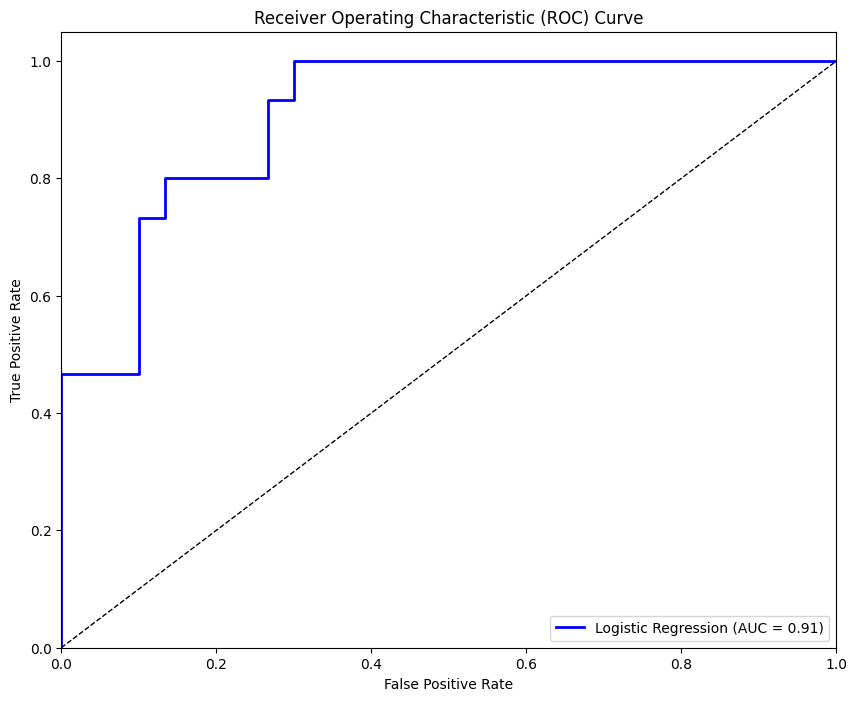

In [ ]:
logistic_scores = model.predict_proba(X_test)

# Binarizing the target variable
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Plotting ROC curves
plt.figure(figsize=(10, 8))

# Plotting Logistic Regression ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), logistic_scores.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)

# Plotting random classifier line
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

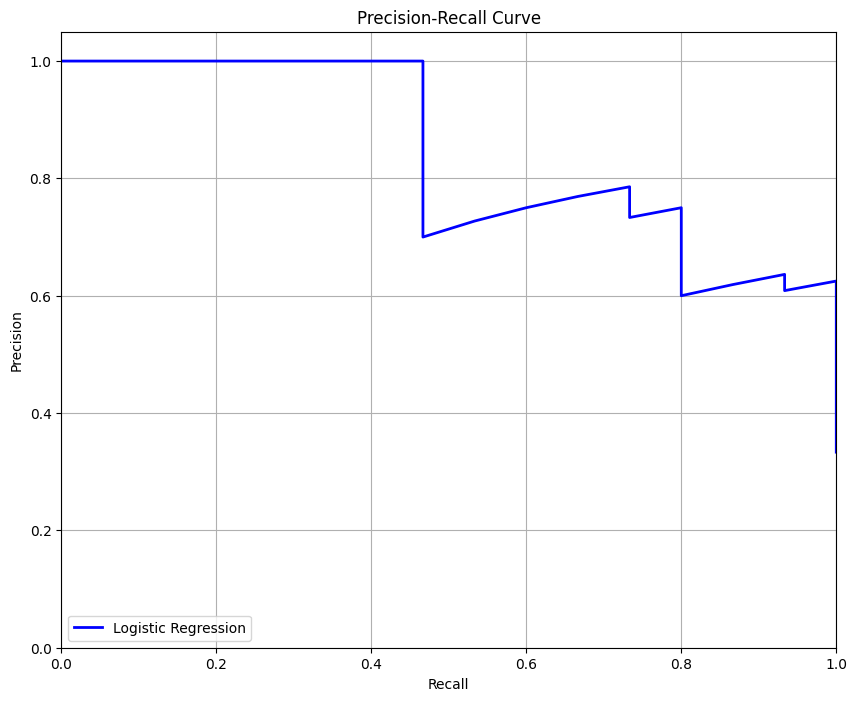

In [ ]:
# Computing precision and recall values
precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin.ravel(), logistic_scores.ravel())

# Plotting Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()